In [32]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import telebot

from sqlalchemy import create_engine
from sqlalchemy.sql import text
from dotenv import load_dotenv

load_dotenv()
warnings.filterwarnings('ignore')

In [11]:
# определяем параметры подлчения к postgres
user_name = os.getenv("POSTGRES_DB_USER")
pwd = os.getenv("POSTGRES_DB_PASSWORD")
port = os.getenv("POSTGRES_DB_HOST_PORT")
db_name = os.getenv("POSTGRES_DB_NAME")
host = 'localhost'

# названия таблиц
banks_table_name = 'banks'
offers_table_name = 'offers'

# создаем подключение к postgres
engine = create_engine(f'postgresql://{user_name}:{pwd}@{host}:{port}/{db_name}')

In [14]:
# получаем данные из БД
query = """
SELECT
    name,
    rate,
    online_rate,
    term,
    amount_from,
    amount_to,
    offer_count,
    final_rate
FROM
    banks
ORDER BY
    date DESC, rate DESC
LIMIT 10
"""

with engine.connect() as connection:
    result_df = pd.read_sql(query, connection)

result_df.head()

,name,rate,online_rate,term,amount_from,amount_to,offer_count,final_rate
0,ПСБ,30.0,0.0,91 – 367 дней,50000,50000.0,8,30.0
1,Банк «Санкт-Петербург»,25.0,25.0,31 – 1825 дней,10000,NaN,5,25.0
2,БыстроБанк,25.0,0.0,1830 – 1840 дней,10000,5000000.0,5,25.0
3,Таврический,24.6,0.0,91 – 1095 дней,50000,NaN,7,24.6
4,Транскапиталбанк,24.5,0.0,91 – 370 дней,50000,NaN,5,24.5


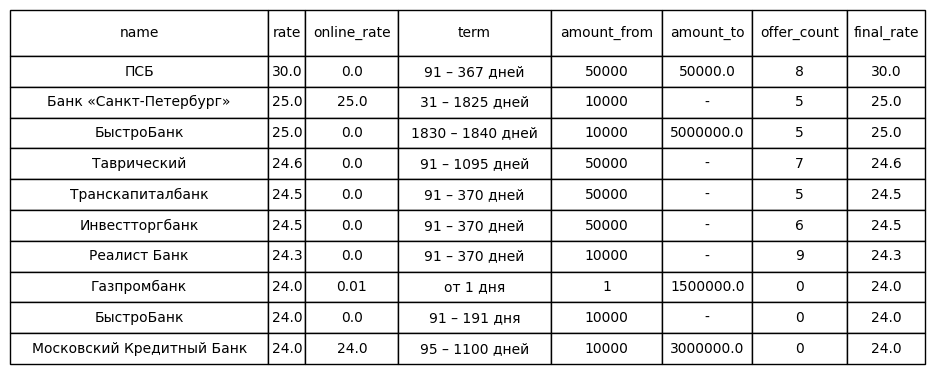

In [30]:
df = result_df.fillna('-')

# таблицу в картинку
fig, ax = plt.subplots(figsize=(10, 4))  # Размер изображения
ax.axis('tight')  # Убираем оси
ax.axis('off')  # Убираем рамку
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

col_widths = [0.15, 0.1, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1]  # Ширина каждой колонки
for i, width in enumerate(col_widths):
    table.auto_set_column_width([i])  # Автоматическая настройка ширины

# Управление высотой строк
row_height = 0.1  # Высота каждой строки
for (row, col), cell in table.get_celld().items():
    cell.set_height(row_height)

# Также можно задать разные высоты для заголовков и данных
for (row, col), cell in table.get_celld().items():
    if row == 0:  # Для заголовков
        cell.set_height(0.15)  # Высота заголовка
    else:  # Для остальных строк
        cell.set_height(0.1)  # Высота данных

plt.savefig('table_image.png', dpi=300, bbox_inches='tight')

In [33]:
# определяем бота
TELEGRAM_TOKEN = os.getenv("TELEGRAM_TOKEN")
VLAD_CHAT_ID = os.getenv("VLAD_CHAT_ID")
ALEX_CHAT_ID = os.getenv("ALEX_CHAT_ID")

bot = telebot.TeleBot(TELEGRAM_TOKEN)

In [37]:
# отправляем картинку
png_path = './table_image.png'

with open(png_path, 'rb') as png_photo:
    bot.send_photo(VLAD_CHAT_ID, png_photo)

with open(png_path, 'rb') as png_photo:
    bot.send_photo(ALEX_CHAT_ID, png_photo)

In [38]:
# удаляем картинки
os.remove(png_path)